# Stellar Pulsation

## Observations of Pulsating Stars

A Luthern pastor and amatuer astronomer [David Fabricius](https://en.wikipedia.org/wiki/David_Fabricius) was observing $\omicron$ Ceti (omicron Ceti) in August 1595.  The brightness of the star slowly faded over a period of ${\sim}$2 months and vanished from the sky by October.  The star eventually recovered and returned to its former brilliance after a couple of months.  By 1662, the star was named [Mira](https://en.wikipedia.org/wiki/Mira), which is Latin for astonishing.  Also by this time, the 11-month period of its cycle was established.  

```{note}
The regular changes in brightness were mistakenly attributed to dark "blotches" on the stellar surface.  Supposedly, Mira would appear fainter when the dark areas were turned toward Earth.
```

Today astronomers recognize that the changes in Mira's brightness are not due to dark spots on its surface, but to the fact that Mira is a **pulsating star**, or a star tha dims and brightens as its surface expands and contracts.  Mira is the protoype of the **long-period variables**, or stars that have irregular light curves and pulsation periods between $100-700$ days.

```{figure-md} Mira-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/8/89/Mira_light_curve.png" alt="Mira"  width="600px">

Light curve of Mira. Image credit: [Wikipedia:Mira](https://en.wikipedia.org/wiki/Mira).
```

The next pulsating star was discovered in 1784 by [John Goodricke](https://en.wikipedia.org/wiki/John_Goodricke) of York, England.  He found that the brightness of [$\delta$ Cephei](https://en.wikipedia.org/wiki/Delta_Cephei) varies regularly with a period of 5.367 days (or 5 days, 8 hours, 48 minutes).  Goodricke contracted pneumonia while observing $\delta$ Cephei and died at the age of 21.  $\delta$ Cephei is different than Mira, in that it varies by less than one magnitude in brightness and never fades from view.  Pulstation stars similar to $\delta$ Cephei are called **classical Cepheids** and are vitally important to astronomy.

```{figure-md} del-Cephei-fig
<img src="cephd.png" alt="Delta Cephei"  width="600px">

Light curve of $\delta$ Cephei. Image credit: [Hyperphysics:delta Cephei](http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/cepheid.html).
```

### The Period-Luminosity Relation

In the early 20th century, [Henrietta Swan Leavitt](https://en.wikipedia.org/wiki/Henrietta_Swan_Leavitt) was hired at Harvard University to compare photographic plates of the same field of stars taken at different times and detect any star that varied in brightness.  Eventually she discovered 2400 classical Cepheids with perios between $1-50$ days, where most of them were located in the Small Magellanic Cloud (SMC).  Leavitt noticed that the more lumious Cepheids took longer to complete their pulsation cycles, where she compared the *apparent magnitudes* of the these SMC stars against their *pulsation periods*.  As a result, she demonstrated that the apparent magnitudes of classical Cepheids are closely correlated with their peirods, with an uncertainty of only $\Delta m \approx \pm 0.5$ at a given period.

```{figure-md} Leavitt-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/9/97/HSLeavittHSCr13Fig2_1912.jpg" alt="Delta Cephei"  width="600px">

Comparision of the apparent magnitude of the SMC stars (y-axis) with respect to their pulsation periods (in days). Image credit: [Wikipedia:Henrietta Swan Leavitt](https://en.wikipedia.org/wiki/Henrietta_Swan_Leavitt).
```

The distance to the SMC is large compared to the distance between stars, so we can assume that all the stars in SMC are roughly the same distance from us (about 91 kpc).  The differences in their apparent magnitudes must be the same as the differences in their absolute magnitudes.  The observed differences in the apparent brightness of the stars must reflect intrinsic differences in their luminosities.

Accurate distances to stars (via parallax) are limited to only the nearest (less than ${\sim}$10 kpc with the Gaia spacecraft) from us due to the ambiguity in a star's apparent brightness as a function of distance.  Astronomers were excited at the prospect of determing the absolute magnitude (or luminosity) of a distant Cepheid simply by timing its pulsation.  Recall that the difference between a star's apparent and absolute magnitude allows for the an independent distance calculation via the distance modulus.  This would permit the measurement of large distances in the universe.

The only stumbling block was the *calibration* of Leavitt's relation.  An independent distance to a single Cepheid had to be obtained to measure its absolute magnitude and luminosity.  The resulting **period-luminosity relation** could be used to measure the distance to any Cepheid.

The nearest classical Cepheid is Polaris (some 200 pc away).  In the early 20th century, this distance was much to great to be measured via stellar parallax.  However, Hertzsprung (in 1913) succeed by using the longer baseline provided by the Sun's motion through space (along with statistical methods) to find the distances to Cepheids haveing a specified period.  The calibrated period-luminosity relation for the $V$ band is described by

```{math}
:label: vis_per_lum_rel
M_{\langle V \rangle} = -2.81 \log_{10}{P_d} - 1.43,
```

where $M_{\langle V \rangle}$ represents the average absolute $V$ magnitude and $P_d$ is the pulsation period *in days*.  In terms of the average stellar luminosity, the relation is given by

\begin{align}
\log_{10}{\frac{\langle L \rangle}{L_\odot}} = 1.15 \log_{10}{P_d} + 2.47.
\end{align}

The python code below shows a linear fit to visual magnitude $M_V$ and pulsation periods $P_d$ from Cepheids in the Large Magellanic Cloud, LMC, ([Strom et al. (2011)](https://www.aanda.org/articles/aa/pdf/2011/10/aa17154-11.pdf)).  This fit reasonably matches the coefficients given in Eqn. {eq}`vis_per_lum_rel`.

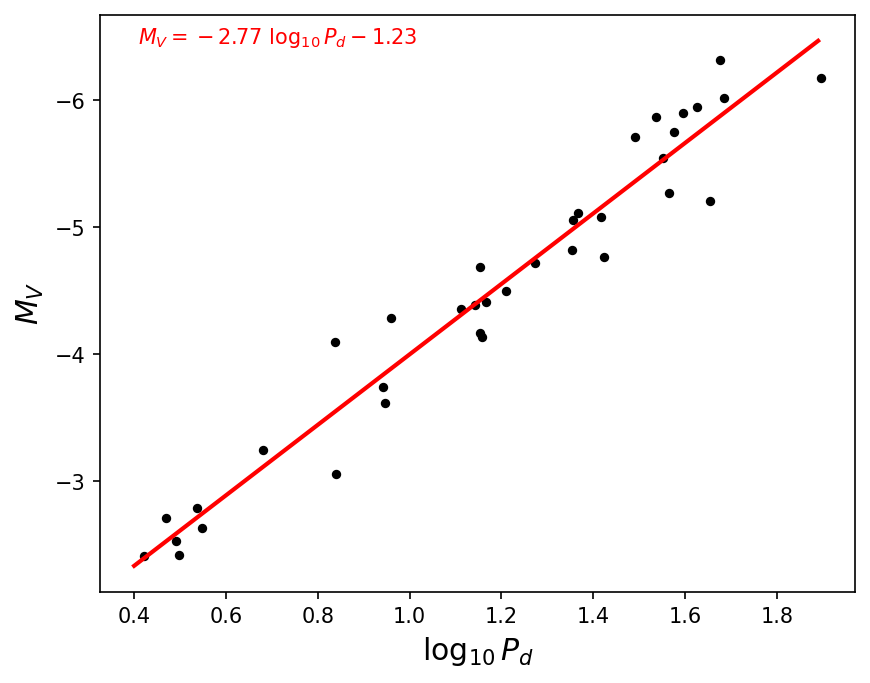

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#Using data from Strom et al. (2011)
#https://www.aanda.org/articles/aa/pdf/2011/10/aa17154-11.pdf

logP, M_V, M_J, M_H, M_K = np.genfromtxt("Strom_Table3.dat",usecols=(1,6,7,9,10),unpack=True)  #log P, M_V, M_J, M_K

#calculate Period-Luminosity Relation
z = np.polyfit(logP,M_V,1)
PL = np.poly1d(z)

width = 5
ms = 7
lw = 2
fs = 'x-large'

fig = plt.figure(figsize=(1.3*width,width),dpi=150)
ax = fig.add_subplot(111)

ax.plot(logP,M_V,'k.',ms=ms)
logP_rng = np.arange(0.4,1.9,0.01)
ax.plot(logP_rng,PL(logP_rng),'r-',lw=lw)
ax.invert_yaxis()


ax.text(0.05,0.95,"$M_V = %1.2f\ \log_{10}{P_d} - %1.2f$" % (z[0],np.abs(z[1])),color='r',horizontalalignment='left',transform = ax.transAxes)
ax.set_xlabel("$\log_{10}{P_d}$",fontsize=fs)
ax.set_ylabel("$M_V$",fontsize=fs);

A problem of measuring stars in the $V$ band is interstellar extinction and reddening is more signficant.  Astronomers can substantially decrease the scatter in the period-luminosity relation by making observations at **infrared** wavelengths, where interstellar extinction is less of a problem.  A fit of the period-luminosity relation in the infrared $H$ band is given by

\begin{align}
H = -3.234 \log_{10}{P_d} + 16.079.
\end{align}

The scatter can be further reduced by adding a color term to the fit because a star's color is independent of its distance.  Using the infrared color index $J-K$, the fit becomes much tighter.  Note that the $J$ band is centered on $1.215\ {\rm \mu m}$, where the $K$ band is centered on $2.157\ {\rm \mu m}$.  Using the color index, the period-luminosity-color relation is given by

\begin{align}
H = -3.428 \log_{10}{P_d} + 1.54 \langle J-K \rangle + 15.637.
\end{align}

Classical Cepheids provide astronomy with its third dimension and supply the foundation for the measurement of extragalactic distances.  Cepheids are super giant stars (hence the pulsation), which are about $50\ R_\odot$ and 1000s of times more luminous, means that they can be seen over intergalactic distances.  They serve as "standard candles," or beacons scattered through the night sky that serve as guideposts for astronomical surveys of the universe.

### The Pulsation Hypothesis for Brightness Variations
A detailed understanding of the physical reasons for the light variations of Cepheids is no required to appreciate the important ues of Cepheids as cosmic distance indicators.  The observed changes in brightness were once thought to have originated with the tidal effects of binary stars.

In 1914, Harlow Shapley argued that the binary theory was fatally flawed because the stellar size needed would exceed the binary orbit.  Shapley advanced an alternative idea: 

>The observed variations in the brightness and temperature of the classical Cepheids were caused by radial pulsations of single stars. He proposed that these stars were rhythmically "breathing" in and out, which corresponded to the process of brightening and dimming.

Four years later Eddington provided a firm theoretical framework for the pulsation hypothesis, which received strong support from the observed correlations among the variations in brightness, temperature, and surface velocity throughout the pulsation cycle.

The change in brightness is primarily due to the ${\sim}1000\ {\rm K}$ variation in the surface temperature of $\delta$ Cephei.  The accompaning change in size makes a lesser contribution to the luminosity.  Although the total excursion of $\delta$ Cephei's surface from its equilibrium radius is large in absolute terms ($\gtrsim 1R_\odot$), it is still only ${\sim}5-10\%$ the size of a supergiant star.

The spectral type of $\delta$ Cephei changes continuously through the cycle from ${\rm F5-G2}$ (hottest-coolest).  A careful examination of Fig. {numref}`{number}<pulsation-fig>` shows that the magnitude and surface velocity curves are nearly identical in shape.  *The star is brightest when its surface is expanding outward most rapidly, after it has passed through its minimum radius.*  The **phase lag** of maximum luminosity is due to the mechanism that maintains its oscillations. 

```{figure-md} pulsation-fig
<img src="Figure07.jpg" alt="Delta Cephei pulsation"  width="600px">

Observed pulsation properties of $\delta$ Cephei. Image credit: Carroll & Ostlie (2007); Data from [Schwarzchild (1938)](https://ui.adsabs.harvard.edu/abs/1938HarCi.431....1S/abstract).
```

### The Instability Strip
The Milky Way is estimated to contain several million pulstating stars.  Given that the total number of stars is several hundred billion, this means that stellar pulsation must be a transient phenomenon.  The positions of the pulsating variables on the H-R diagram confirm this conclusion.

```{figure-md} variables-HR-fig
<img src="https://www.aavso.org/sites/default/files/images/jcd-hrd-norm.png" alt="HR diagram pulsation"  width="400px">

Variable stars on an H-R diagram schematic. Image credit: [Christensen-Dalsgaard (2004)](https://ui.adsabs.harvard.edu/abs/2004ESASP.559....1C/abstract).
```

Rather than being located on the main sequence, the majority of pulsating stars occupy a narrow (${\sim}600-1100\ {\rm K}$ wide), nearly vertical **instability strip** on the right-hand side of the H-R diagram.  Stars evolve along tracks towards the RGB and begin to pulsate as the enter the instability strip and cease their oscillations upon leaving.

### Some Classes of Pulsating Stars
Astronomers have divided pulsating stars into several classes. Some of these are listed below.

:::{table} Pulsating Stars
:widths: auto
:align: center

| Type | Period Range | Population Type | Radial or <br> Nonradial |
| ---  | --- | --- | --- |
| Long-Period Variables (LPV) | $100-700\ {\rm days}$ |  I, II |  R |
| Classical Cepheids | $1-50\ {\rm days}$ |  I |  R |
| W Virginis stars| $2-45\ {\rm days}$ |  II |  R |
| RR Lyrae stars | $1.5-24\ {\rm hours}$ |  II |  R |
| $\delta$ Scuti stars| $1-3\ {\rm hours}$ |  I |  R, NR |
| $\beta$ Cephei stars | $3-7\ {\rm hours}$ |  I |  R, NR |
| ZZ Ceti | $100-1000\ {\rm seconds}$ |  I |  NR |
:::

The W Virginis stars are metal-deficient (Pop. II) Cepheids and are about $4\times$ less luminoius than classical Cepheids with the same period.  Their period luminosity relation is thus lower than and parallel to the one shown for the classical Cepheids.

RR Lyrae stars (Pop. II) are horizontal-branch stars found in globular clusters.  Since all RR Lyrae stars have nearly the same luminosity, they are also useful as standard candles for distance measurements.

The $\delta$ Scuti variables are evovled $\rm F$ stars found near the main sequence.  They exhibit both radial and nonradial oscillations, where the latter is a more complicated motion than will be discussed later.  Below the main sequence are the pulsating white dwarfs called ZZ Ceti stars.

The above listed star types (W Vir, RR Lyr, $\delta$ Scu, and ZZ Cet) lie far within the instability strip, and they share a common mechanism that drives the oscillations.  The long-period variables (e.g., Mira and $\beta$ Cephei stars) are located outside of the instability strip occupied by the classical Cepheids and RR Lyrae stars.



## The Physics of Stellar Pulsation
A wealth of knowledge has been obtained about the Earth's interior using seismic waves produced by earthquakes and other sources.  In the same manner, astrophysicists model the pulsational properties of stars to better understand their internal structure.  By numerically evaluating an evolutionary sequence of stellar models and comparing the pulsational characteristics (e.g., periods, amplitudes, etc.) of the models with observations, astronomers can further test their theories of stellar structure and evolution.  Moreover, they obtain a detailed view of the stellar interior in the process.

### The Period-Density Relation
The radial oscillations of a pulsating star are the result of *sound* waves resonating in the stellar interior.  A rough estimate of the pulsation period $\Pi$ can be obtained by considering how long it would take a sound wave to traverse across a model star of radius $R$ and constant density $\rho$.  Recall that the adiabatic sound speed is given by

\begin{align*}
v_s = \sqrt{\frac{\gamma P}{\rho}},
\end{align*}

where $P$ represents the pressure.

```{note}
The pulsation period is represented using $\Pi$ so that it is not confused with the pressure $P$.  While another symbol $T$ could be used for period, it could lead to confusion with temperature.  Therefore $\Pi$ is commonly used for pulsation period in stellar pulsation theory studies.
```

The pressure can be found for hydrostatic equilibrium, using the (*unrealistic*) assumption of constant density, which gives

```{math}
:label: con_dens_hydro
\frac{dP}{dr} = -\frac{GM_r\rho}{r^2} = -\frac{4\pi}{3}G\rho^2 r.
```

Using the boundary condition $P=0$ at the surface, Eqn. {eq}`con_dens_hydro` can be integrated to get the pressure as a function of $r$,

\begin{align}
P(r) = \frac{2\pi}{3} G\rho^2 (R^2-r^2).
\end{align}

The pulsation period is roughly

```{math}
:label: period_density_rel
\Pi &\approx 2 \int_{0}^R \frac{dr}{v_s} \approx 2 \int_{0}^R \frac{dr}{\sqrt{\frac{2\pi}{3}G\rho (R^2 -r^2)}}, \\
 & \approx \frac{2}{\sqrt{\frac{2\pi}{3}G\rho }}\int_{0}^R \frac{dr}{\sqrt{R^2 - r^2}}, \\
 & \approx \sqrt{\frac{3\pi}{2\gamma G \rho}}.
```

This shows that a star's pulsation period is inversely proportional to the square root of its mean density.  This **period-mean density relation** explains why the pulsation period decreases as we move down the instability strip from the (low density) supergiants to the very dense white dwarfs (See Fig. {numref}`{number}<variables-HR-fig>`).

```{note}
Pulsating white dwarfs exhibit nonradial oscillations, and their periods are longer than predicted by the period-mean density relation.
```

The tight period-luminoisty relation discovered by Leavitt exists because the instability strip is roughly parallel to the lumionisty axis of the H-R diagram in Fig. {numref}`{number}<variables-HR-fig>`.  The quantitative agreement between Eqn. {eq}`period_density_rel` with the observed periods of Cepheids is not too bad, considering the assumptions.  

Consider a typical Cepheid having a mass and radius of $5\ M_\odot$ and $50\ R_\odot$, respectively.  Then $\Pi \approx 10\ {\rm days}$.  This falls within the range of periods measured for the classical Cepheids.

### Radial Modes of Pulsation
The sound waves involved in **radial modes** of stellar pulsation are essentially *standing waves*, similar to the standing waves that occur in an organ pipe that is open at one end.  Both the star and the organ pipe can sustain several oscillation modes.  The standing wave for each mode has 

- a *node* at one end (the star's center; the pipe's closed end), where the gases do not move, and
- an *antinode* at the other end (the star's surface; the pipe's open end).

For the **fundamental mode**, the gases move in the same direction at every point in the star or pipe.  There is a single node between the center and the surface, which represents the **first overtone** mode, with the gases moving in opposite directions on either side of the node, and two ndes for the **second overtone**.

```{figure-md} radial-modes-fig
<img src="Figure10.jpg" alt="Radial modes"  width="600px">

Radial modes for a pulsating star.  The waveform for each mode has been arbitrarily scaled so that $\delta r/R = 1$ at the stellar surface.  The maximum surface ratio $\delta r/R = 0.05-0.10$ for a classical Cepheid.  Figure credit: Carroll & Ostlie (2007).
```

For radial modes, the motion of the stellar material occurs primarily in the surface regions while some oscillation occurs deep inside the star.  This effect is most prominent for the fundamental mode, where non-negligible amplitudes exist.

The vast majority of the classical Cepheids and W Virginis stars pulsate in the fundamental mode.  The RR Lyrae variables pulsate in either the fundamental or the first overtone, with a few oscillations in both modes simultaneously.  The long-period variables (LPVs) may also oscillate in either the fundamental mode or the first overtone.

### Eddington's Thermodynamic Heat Engine
To explain the mechanism that powers these standing sound waves, Eddington proposed that pulsating stars are **thermodynamic heat engines**.  The gases comprising the layers of the star do thermodynamic work $(PdV)$ as they expand and contract throughout the pulsation cycle.

- If $\oint P dV > 0$ for the cycle, a layer does net positive work on its surroundings and contributes to driving the oscillations;
- If $\oint P dV < 0$, the net work is negative and tends to dampen the oscillations.
- If the total work (found by adding up the contributions from all the layers) is positive, the oscillations will grow in amplitude.
- If the total work is negative, then the oscillations will decay.

These changes in pulsation amplitude continue until an equilibrium value is reached, when the total work done by all the layers is zero.

As for any heat engine, the net work done by each layer of the star during one cycle is the difference between heat flowing into the gas and the heat leaving the gas.  For driving, the heat must enter the layer during the high-temperature part of the cycle and leave during the low-temperature part.  

```{note}
Just as the spark plug in an internal combustion engine (ICE) fires at the end of the compression stroke, the driving layers of a pulsating star must absorb heat around the time of their maximum compression.  In this case, the maximum pressue will occur after maximum compression, and the oscillations will be amplified.
```



### The Nuclear $\epsilon$ Mechanism

**Where within the star could the driving take place?** Eddington considered that when the center of the star is compressed, its temperature and density rise which increase the thermonuclear energy generation rate $\epsilon$.  

However, there is a node at the center of the star.  The pulsation amplituded is very small near the center.  Although this energy mechanism (**$\epsilon$ mechanism**) operates in the core of a star, it is usually not enough to drive the star's pulsation.  Variations in the thermonuclear energy generation rate $\epsilon$ produce oscillations that may prevent the formation of $\gtrsim 90\ M_\odot$ stars.

### Eddington's Valve
With the failure of the $\epsilon$ mechanism, Eddington suggested an alternative, a *valve mechanism*.

**Consider if a layer of the star became more opaque upon compression**, then it could "dam up" the energy flowing toward the surface and push the surface layers upward.  As this expanding layer became more transparent, the trapped heat could escape and the layer would fall back down to begin the cycle anew.

```{epigraph}
To apply this method, we must make the star more heat-tight when compressed than when expanded. --Sir Arthur Stanley Eddington
```

In other words, *the opacity must increase with compression*.

In most regions of the star, the opacity actually *decreases* with compression.  For a Kramers law, the opacity $\kappa$ depends on the density and temeperature of the stellar material as $\kappa \propto \rho T^{-3.5}$.  As the layers of a star are compressed, their density and temperature **both increase**.  The opacity is more sensitive to the temperature than to the density, and the opacity usually decreases upon compression.  

It takes special circumstances to overcome the damping effect of most stellar layers, which explains why stellar pulsation is so rare (only 1 out of every $10^5$ stars).

### Opacity Effects and the $\kappa$ and $\gamma$ Mechanisms

The conditions responsible for exciting and maintaining the stellar oscillations were first identified by [S. A. Zhevakin](https://en.wikipedia.org/wiki/Sergei_Alexandrovich_Zhevakin), and verified in detailed calculations by [Rudolph Kippenhahn](https://en.wikipedia.org/wiki/Rudolf_Kippenhahn), [Norman Baker](https://en.wikipedia.org/wiki/Norman_H._Baker), and John P. Cox.  They found that the regions of a star where Eddington's valve mechanism can successfully operate are its *partial ionization zones*.

In these layers of the star, where the gases are partially ionized, part of the work done by the gases (as they are compressed) produces further ionization rather then an increase in temperature of the gas.  With a samller temerpature rise, the increase in density with compression produces a corresponding increase in the Kramers opacity.

```{figure-md} opacity-RRLyrae-fig
<img src="Figure13.jpg" alt="Temperature variations"  width="600px">

Variations in the temperature and opacity throughout an RR Lyrae stellar model at the time of maixmum compression.  In the ${\rm He\ II}$ partial ionization zone ($T\approx 4\times 10^4\ {\rm K}$), $\delta \kappa > 0$ and $\delta T$ is reduced.  Figure credit: Carroll & Ostlie (2007).
```

Similarly, during expansion, the temperature does not decrease as much as expected since the ions now recombine with electrons and release energy.  When the density term in the Kramers law dominates, the opacity decreases with decreasing density during the expansion.  This layer of the star can absorb heat during compression, be pushed outward to release the heat during expansion, and fall back again to begin another cycle.  The opacity mechanism is called the **$\kappa$-mechanism**.

In a partial ionziation zone, the $\kappa$-mechanism is reinforced by the tendency of heat to flow into the zone during compression because its temperature has increased less than the adjacent stellar layers.  This effect is called the **$\gamma$-mechanism**, after the smaller ratio of specific heates caused by the increased values of $C_p$ and $C_V$.  

Partial ionization zones are the pistons that drive the oscillations of stars, where they modulate the energy flow through the stellar layers and are the direct cause of stellar pulsation.

### The Hydrogen and Helium Partial Ionization Zones
In most stars, there are two main ionization zones.  

- The first is a broad zone where both the ionization of neutral hydrogen and the first ionization of helium occur in layers with a characteristic temperature of $1-1.5 \times 10^4\ {\rm K}$.  These layers are called the **hydrogen partial ionization zone**. 

- The second, deeper zone involves the second ionization of helium, which occurs at a characteristic temperature of $4\times 10^4\ {\rm K}$.  Unsurpisingly, this is called the **${\rm He\ II}$ partial ionization zone**.

```{figure-md} local-parial-ions-fig
<img src="Figure14.jpg" alt="Paritial ionization"  width="600px">

Hydrogen and helium ionization zones in stars of different temperatures.  For each point in the star, the vertical axis displays the logarithm of the fraction of the star's mass that lies *above* that point.  Figure credit: Carroll & Ostlie (2007).
```

The location of these ionization zones with the star determines its pulsational properties.  

- If the star is too hot ($7500\ {\rm K}$), the ionization zones will be very near the surface.  At this position, the density is quite low, and there is not enough mass available to drive the oscillations effectively.  This accounts for the hot **blue edge** of the instability strip on the H-R diagram.

- In a cooler star ($6500\ {\rm K}$), the characteristic temperatures of the ionzation zones are found deeper in the star.  There is more mass for the ionization zone "piston" to push around, and the first overtone mode may be excited.

- In a still cooler star ($5500\ {\rm K}$), the ionization zones occur deep enough to drive the fundamental mode of pulsation.  

However, if a star's surface temperature is too low, the onset of efficient convection in its outer layers may dampen the oscillations.  The transport of enerby via convection is more effective when the star is compressed, and the convecting stellar material may lose heat at the minimum radius.  This would overcome the damming up of heat by the ionization zones and quench the pulsation of the star.  The cool **red edge** of the instability strip is the result of the damping effect of convection.

Detailed numerical calculations demonstrate a good agreement for the location of the instablilty strip on the H-R diagram.  These computations show that it is the $\rm He\ II$ partial ionization zone that is primarily responsible for driving stellar oscillations within the instability strip.  If the effect of the helium ionization is artificially removed, then the model stars will not pulsate.

The hydrogen ionization zone plays a more subtle role.  As a star pulsates, the hydrogen ionization zone moves toward or away from the surface as the zone expands and contracts in response to the changing temperature of the stellar gases.  The star is brightest when the *least mass* lies between the hydrogen ionziation zone and the surface.

As a star oscillates, the location of an ionization zone changes with respect to both its radial position $r$ and the mass enclosed $M_r$.  The luminosity incident on the *bottom* of the hydrogen ionization zone is a maximum *at minimum radius*, but this propels the zone outward (through mass) most rapidly at that instant.  The emergent luminosity is greatest *after* minimum radius, when the zone is nearest the surface.  The delaying action (of the hydrogen partial ionization zone) produces the phase lag observed for classical Cepheids and RR Lyrae stars.

The mechanisms repsonsible for the pulsation of stars outside the instability strip are not always well understood.  The long-period variables (LPVs) are red supergiants with huge, diffuse convective envelopes surrounding a compact ocre.  Their spectra are dominated by molecular absorption lines and emission lines that reveal the existence of atmospheric shock waves and significant mass loss.  

### $\beta$ Cephei Stars and the Iron Opacity "Bump"
The $\beta$ Cephei stars pose another interesting challenge, where they are located in the upper left-hand side of the H-R diagram (i.e., very hot and luminous).  $\beta$ Cepheis are early B stars with effective temperatures from $2-3 \times 10^4\ {\rm K}$ and typically luminosity classes of III, IV, and V.  

Given their high effective temperatures, hydrogen is completely ionized, and the helium ionization zone is too near the surface to effectively drive pulsations.  After many years, it was realized tha the $\kappa$ and $\gamma$ mechanisms are still active in $\beta$ Cephei stars, but the element responsible for the driving is iron.

The larger number of absorption lines in the spectrum of iron implies that iron contributes significantly to stellar opacities at temperatures near $10^5\ {\rm K}$.  This effect can be seen in the "iron bump" above $10^5\ {\rm K}$ in the plot of opacity.  The depth of this iron ionization region is sufficient to produce net positive pulsational driving in these stars.

## Modeling Stellar Pulsation

### Nonlinear Hydrodynamic Models
A pulsating star is not in hydrostatic equilibrium, where a more general set of equations is employed that takes the oscillation of mass shells into account.  For example, Newton's second law

\begin{align*}
\rho \frac{d^2 r}{dt^2} = -\frac{GM_r \rho}{r^2} - \frac{dP}{dr},
\end{align*}

must be used for hydrostatic equilibrium.  But the differential equations describing nonequilibrium mechanical and thermal behavior of a star are needed.  Such equations may be replaced by *difference equations* and solved numerically.  The model star is displaced from its equilibrium configuration and "released" to begin its oscillation.  The mass shells expand and contract, pushing against each other as they move.

If the conditions are right, the ionization zones in the model star will drive the oscillations, and the pulsation amplitude will slowly increase; otherwise the amplitude will fade away.  Computer programs that carry out these calculations have been successful in modeling the details observed in the light and radial velocity curves of Cepheid variables.

The main advantage of the preceeding approach is that it is a **nonlinear** calculation, capable (in principle) of modeling the complexitites of large pulsation amplitudes and reproducing the nonsinusoidal shape of *actual* light curves.  One disadvantage lies in the computer resources required:

- The process requires a significant amount of CPU time andmemory.
- Many (sometimes thousands of) oscillations must be evaluated before the model settles down into a well-behaved periodic motion.
- Even more periods may be required for the model to reach its *limit cycle*, when the pulsation amplitude has reached its final value.

In some cases the computer simulations of certain classes of pulsating stars may never attain a truly periodic solution but exhibit chaotic behavior instead, as observed in some real stars.

A second disadvantage of nonlinear calulations lies in the challenges involved in accurately convering models at each time step.  Numerical instabilities in the nonlinear equations can cause calculations to lead to unphysical solutions.  This is particularly true when theories of time-dependent convection are required for red giants and supergiants.

### Linearizing the Hydrodynamic Equaitons
An alternative to the nonlinear approach is to **linearize** the differential equaitons by considering only small-amplitude oscillations.  This is done by writing every variable in the differential equations as an equilibrium value plus a small change due to the pulsation (i.e., a perturbative method).  For example, the pressure $P$ would be written as $P = P_o + \delta P$, where $P_o$ is the pressure in a mass shell of the equilibrium model, and $\delta P$ is the small change in pressure that occurs as that mass shell moves in the oscillating model star.

Note that $\delta P$ varies in time, while $P_o$ is a constant.  When the variables written in this manner are inserted into the differential equations, the terms containing only equilibrium quantities cancel, and terms that involve powers greater than second order (i.e., greater than $(\delta P)^2) may be discarded because they are negligibly small.  The resulting linearized differential equations and their associated boundary conditions (also linearized) are similar to the equations for a wave on a string or in an organ pipe.

Only certain standing waves with specific periods are permitted, where the the pulsation modes of the star are clearly identified.  The equations are sufficiently complicated that the motion of the star is forced to be sinusoidal, and the limiting value of the pulsation amplitude cannot be determined.  Modeling the complexities of the full nonlinear behavior of the stellar model is thus sacrificed.

````{exercise}
:class: orange

**Consider an unrealistic (but very instructive) model of a pulsating star called a *one-zone model*.  It consists of a central point mass equal to the entire mass of the star $M$, surrounded by a single thin, spherical shell of mass $m$ and radius $R$ that represents the surface layer of the star.  The interior of the shell is filled with a massless gas of pressure $P$ whose function is to support the shell against gravity.**  

**Determine the pulsation period $\Pi$ using the perturbation approximation.**

First, we apply Newton's second law for a shell as 

\begin{align}
\rho \frac{d^2 r}{dt^2} &= -\frac{GM_r \rho}{r^2} - \frac{dP}{dr}, \\
\frac{m}{V} \frac{d^2 R}{dt^2} &= -\frac{GM}{R^2}\frac{m}{V}  + \frac{P}{R}, \\
m \frac{d^2 R}{dt^2} &= -\frac{GMm}{R^2}  + PA, \\
m \frac{d^2 R}{dt^2} &= -\frac{GMm}{R^2}  + 4\pi R^2 P.
\end{align}

For the equilibrium model, the left-hand side of this equation is zero, where

```{math}
:label: equil_model_deriv
\frac{GMm}{R_o^2}  = 4\pi R_o^2 P_o.
```

The linearization is accomplished by writing the star's radius and pressure as

\begin{align}
R &= R_o + \delta R, & \text{and} \\
P &= P_o + \delta P, &
\end{align}

which we then insert into our result from Newton's second law.  This gives

\begin{align}
m \frac{d^2}{dt^2}\left[R_o + \delta R\right] &= -\frac{GMm}{\left(R_o + \delta R\right)^2}  + 4\pi \left(R_o + \delta R\right)^2 (P_o + \delta P).
\end{align}

Using the first-order approximation

\begin{align*}
\frac{1}{\left(R_o + \delta R\right)^2} &= \frac{1}{R_o^2\left(1 + \frac{\delta R}{R_o}\right)^2}, \\
&= \frac{1}{R_o^2}\left(1 + \frac{\delta R}{R_o}\right)^{-2}, \\
&\approx \frac{1}{R_o^2}\left(1 - 2\frac{\delta R}{R_o}\right)
\end{align*}

and keeping only those terms involving the first powers of the deltas results in 

\begin{align}
m \frac{d^2 (\delta R)}{dt^2} &= -\frac{GMm}{R_o^2} + 2\frac{GMm}{R_o^3} + 4\pi R_o^2 P_o + 8\pi R_o P_o \delta R + 4\pi R_o^2 \delta P,
\end{align}

where $d^2 R_o/dt^2 = 0$ is used for the equilibrium model.  Also in the equlibrium model (Eq. {eq}`equil_model_deriv`), the first and third terms on the right-hand side cancel, which leaves

```{math}
:label: Press_Newt_2nd
m \frac{d^2 (\delta R)}{dt^2} =  2\frac{GMm}{R_o^3} + 8\pi R_o P_o \delta R + 4\pi R_o^2 \delta P.
```

**This is the linearized version of Newton's second law for our one-zone model.**

To reduce from two variables ($\delta R$ and $\delta P$) to one, we assume that the oscillations are *adiabatic*.  As a result, the pressure and volume are related by the adiabatic relation $PV^\gamma =\ \text{constant}$, where $\gamma$ is the ratio of specific heats of the gas.  The volume of the one-zone model is just the volume of a sphere ($4/3\pi R^3$), the adiabatic relation becomes $PR^{3\gamma} =\ \text{constant}$.  Then the linearized version is found as (see HW)

```{math}
:label: adiabatic_press_rad
\frac{\delta P}{P_o} = -3\gamma \frac{\delta R}{R_o}.
```

Using this equation, $\delta P$ can be eliminated from Eqn. {eq}`Press_Newt_2nd`.  In addition, the $8\pi R_o P_o$ can be replaced by $2GMm/R_o^3$ using Eqn. {eq}`equil_model_deriv`.  Then, the mass $m$ of the shell cancels, which leaves the linearized equation for $\delta R$,

```{math}
:label: linearized_R_eqn
\frac{d^2(\delta R)}{dt^2} = -(3\gamma - 4)\frac{GM}{R_o^3}\delta R.
```
If $\gamma > 4/3$, the above relation reduces to the equation for simple harmonic motion, which has a solution $\delta R = A \sin{(\omega t)}$, where $A$ represents the pulsation amplitude and $\omega$ is the angular pulsation frequency.  Substituting this particular solution into Eqn. {eq}`linearized_R_eqn` results in

\begin{align}
\omega^2 &= (3\gamma - 4)\frac{GM}{R_o^3}.
\end{align}

From this, we can determine the pulsation period of the one-zone model as

\begin{align}
\Pi & = 2\pi/\omega, \\
&= \frac{2\pi}{\sqrt{\frac{4\pi}{3}G\rho_o (3\gamma - 4)}},
\end{align}

where $\rho_o$ is the average density of the equilibrium model.  For an ideal monatomic gas, $\gamma = 5/3$.  Except for factors of order unity, this is the same as our earlier estimate (Eqn. {eq}`period_density_rel`) when we considered the time required for a sound wave to cross the stellar diameter.
````

```{note}
In the above example, the approximations that the pulsation of the one-zone model was *linear* and *adiabatic* were used to simplify the calculation.  Note that the pulsation amplitude $A$ canceled in this example.  The inability to calculate this amplitude is an inherent drawback of the linearized approach to pulsation.
```

### Nonlinear and Nonadiabatic Calculations
Because no heat is allwed to enter (or leave) the layers of a stellar model in an adiabitic analysis, the oscillation amplitude remains constant.  However, astronomers need to know which modes will grow and which will decay away.  This calculation must include the physics involved in Eddington's valve mechanism.

The equations describing the heat transfer and radiation through the stellar layers must be incorporated in a *nonadiabatic* computation.  These nonadiabatic expressions may also be linearized and solved to obtain the periods and growth rates of the individual modes.  However, a more sophisticated (and costly) nonlinear, nonadiabatic calculation is needed to reproduce the complicated light and radial velocity curves for some variable stars.  As a result, such computations are performed numerically.

### Dynamical Stability
Equation {eq}`linearized_R_eqn` provides a very important insight into the **dynamical stability** of a star.  If $\gamma < 4/3$, then the right-hand side is positive.  The solution changes from a sinusoidal function to a decaying exponential, or $\delta R = Ae^{-\kappa t}$, where $\kappa^2$ is the same as $\omega^2$.  Instead of pulsating, the star *collapses* if $\gamma < 4/3$.  The increase in gas pressure is not enough to overcome the inward pull of gravity and push the mass shell back out again, which results in a *dynamically unstable* model.

For the case of *nonadiabatic* oscillations, the time dependence of the pulsation is usually taken to be the real part of $e^{i\sigma t}$, where $\sigma$ represents the complex frequency $\sigma = \omega + i\kappa$.  in this expression, $\omega$ is the pulsation frequency and $\kappa$ is a *stability coefficient*.  The pulsation amplitude is then proportional to $e^{-\kappa t}$, and $\kappa^{-1}$ is the characteristic time for growth or decy of the oscillations.

## Nonradial Stellar Pulsation
As some stars pulsate, their surfaces excecute a more complicated type of **nonradial** motion in which some regions of its surface expand while other areas contract.

### Nonradial Oscillations and Spherical Harmonic Functions
The python code produces a figure shoing the angular patterns for several nonradial modes.  If the stellar surface is moving outward within the red regions, then it is moving inward within the blue regions.  Scalar quantitites, such as the change in pressure $\delta P$, follow the same pattern with positive values in some areas and negative values in others.

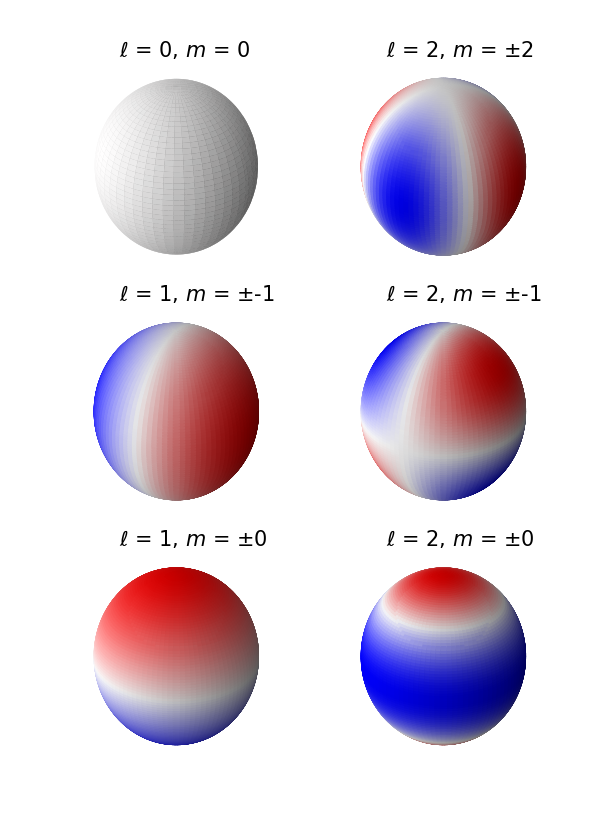

In [155]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import numpy as np
from scipy.special import sph_harm

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

sph_idx = [(0,0),(2,2),(1,-1),(2,-1),(1,0),(2,0)]

width = 2.5
cmap = cm.bwr
my_cmap = matplotlib.colormaps.get_cmap(cmap)
# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=(2*width,3*width),dpi=150)
ax_list = []
for i in range(1,7):
    ax = fig.add_subplot(3,2,i, projection='3d',aspect='equal')
    if i == 1:
        # Plot the surface
        ax.plot_surface(x, y, z, color=my_cmap(0.5))
        label = '$\ell$ = %i, $m$ = %i' % (0,0)
    else:
        l,m = sph_idx[i-1]
        # Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
        fcolors = sph_harm(m, l, theta, phi).real
        fmax, fmin = fcolors.max(), fcolors.min()
        fcolors = (fcolors - fmin)/(fmax - fmin)
        ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=my_cmap(fcolors))
        label = '$\ell$ = %i, $m$ = $\pm$%i' % (l,m)
    ax.text(-0.8,0,1.2,label,None)
    # Turn off the axis planes
    ax.set_axis_off()
    ax_list.append(ax)
fig.subplots_adjust(hspace=-0.35,wspace=-0.15)
fig.savefig("Sph_Harm.png",bbox_inches='tight',dpi=150)

Formally, these patterns are described by the *real* parts of the spherical harmonic functions $Y^m_\ell(\theta,\phi)$, where $\ell \ge 0$ (an integer) and $m$ is also an integer between $-\ell$ and $+\ell$.  There are $\ell$ *nodal circles* (where $\delta r = 0$), with $|m|$ of these circles passing through the poles of the star and the remaining $\ell - |m|$ nodal circles parallel to the star's equator.  If $\ell = m = 0$, the n the pulsation is purely radial.

A few examples of $Y^m_\ell(\theta,\phi)$ functions are:

\begin{align*}
Y^0_0(\theta,\phi) &= K^0_0, & Y^0_2(\theta,\phi) &= K^0_2\ \left(3\cos^2{\theta} -1\right), \\
Y^0_1(\theta,\phi) &= K^0_1\ \cos{\theta},  & Y^{\pm 1}_2(\theta,\phi) &= K^{\pm 1}_2\ \sin{\theta}\cos{\theta}e^{\pm i\phi}, \\
Y^{\pm 1}_1(\theta,\phi) &= K^{\pm 1}_1\ \sin{\theta}e^{\pm i\phi}, & Y^{\pm 2}_2(\theta,\phi) &= K^{\pm 2}_2\ \cos^2{\theta}e^{\pm 2i\phi}, \\
\end{align*}

where the $K^{\pm m}_\ell$ are normalization constants and $i$ is the imaginary number.

```{note}
Recall from Euler's formula that $e^{\pm mi\phi} = \cos(m\phi) \pm i\sin{m\phi}$.  thus the real part of $e^{\pm mi\phi}$ is just $\cos(m\phi)$.
```

The patterns for nonzero $m$ represent *traveling* waves that move across the star parallel to its equator.  The time required for the waves to travel around the star is $|m|$ times the star's pulsation period.  

It is important to note that the star itself may not be rotating at all.  Just as water waves may travel across the surface of a lake without the water itself making the trip, these traveling waves are distrubances that pass through the stellar gases.


### The $p$ and $f$ Modes

### The Acoustic frequency

### The $g$ modes

### The Brunt-V&auml;is&auml;l&auml; (Buoyancy) Frequency 

### The $g$ and $p$ Modes as Probes of Stellar Structure

## Helioseismology and Asteroseismology

### The Five-Minute Solar Oscillations 

### Differential Rotation and the Solar Convection Zone

### Probing the Deep Interior

### Driving Solar Oscillations

### $\delta$ Scuti Stars and Rapidly Oscillating Ap Stars

## **Homework**

```{admonition} Problem 1
**Derive Eqn. {eq}`adiabatic_press_rad` by linearizing the adiabatic relation $PV^\gamma =\ \text{constant}$.**
```